In [2]:
import pandas as pd

pd.set_option('display.max_colwidth',100)

In [3]:
df = pd.read_csv(r"C:\Users\PC027\Desktop\Project\KOSPO공모전\전처리 데이터\dataframe_7.csv", encoding="cp949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             500 non-null    object 
 1   전력_설비용량        500 non-null    object 
 2   전력_공급능력        500 non-null    object 
 3   전력_공급예비력       500 non-null    object 
 4   전력_예비율         500 non-null    float64
 5   종가             500 non-null    int64  
 6   육지 최저가         500 non-null    int64  
 7   매수 건수          500 non-null    int64  
 8   육지 체결건수        500 non-null    int64  
 9   육지 체결물량        500 non-null    int64  
 10  육지 매도물량        500 non-null    int64  
 11  육지 매도건수        500 non-null    int64  
 12  육지 평균가         500 non-null    int64  
 13  총 거래건수         500 non-null    int64  
 14  육지 상한가         500 non-null    int64  
 15  매수 물량          500 non-null    int64  
 16  육지 최고가         500 non-null    int64  
 17  육지 하한가         500 non-null    int64  
 18  거래금액      

# 컬럼 타입 변환
Datetime으로의 컬럼 타입변화 및 기타 object 컬럼들에 대한 타입 변환을 실행한다.

In [4]:
# 일시 -> datetime type으로 변환
df['일시'] = pd.to_datetime(df['일시'])

In [5]:
# object 컬럼들 확인
object_df = df.select_dtypes(include='object')

In [6]:
object_df.head()

,전력_설비용량,전력_공급능력,전력_공급예비력,GS EPS_RPS,GS동해전력_RPS,대륜발전_RPS,동두천드림파워_RPS,신평택발전_RPS,씨지앤율촌전력_RPS,에스파워_RPS,...,포천민자발전_RPS,포천파워_RPS,한국남동발전_RPS,한국남부발전_RPS,한국동서발전_RPS,한국서부발전_RPS,한국수력원자력_RPS,한국수자원공사_RPS,한국중부발전_RPS,한국지역난방공사_RPS
0,"125,333","95,372","18,192","497,728","546,175","71,099","421,115","129,745","497,429","360,169",...,"307,083","203,931","5,712,435","4,578,489","4,555,345","4,148,958","5,457,644","57,057","4,077,056","831,368"
1,"125,333","94,123","13,976","497,728","546,175","71,099","421,115","129,745","497,429","360,169",...,"307,083","203,931","5,712,435","4,578,489","4,555,345","4,148,958","5,457,644","57,057","4,077,056","831,368"
2,"125,333","96,303","17,143","497,728","546,175","71,099","421,115","129,745","497,429","360,169",...,"307,083","203,931","5,712,435","4,578,489","4,555,345","4,148,958","5,457,644","57,057","4,077,056","831,368"
3,"125,353","94,425","12,096","497,728","546,175","71,099","421,115","129,745","497,429","360,169",...,"307,083","203,931","5,712,435","4,578,489","4,555,345","4,148,958","5,457,644","57,057","4,077,056","831,368"
4,"125,358","94,735","12,383","497,728","546,175","71,099","421,115","129,745","497,429","360,169",...,"307,083","203,931","5,712,435","4,578,489","4,555,345","4,148,958","5,457,644","57,057","4,077,056","831,368"


In [7]:
# object to int
for col in df.columns:
    if str(df[col].dtype) == "object":
        df[col] = df[col].apply(lambda x : int(x.replace(",","")))

print(df.select_dtypes(include="object").shape[1])

0


In [8]:
df

,일시,전력_설비용량,전력_공급능력,전력_공급예비력,전력_예비율,종가,육지 최저가,매수 건수,육지 체결건수,육지 체결물량,...,양수_거래량,연료전지_거래량,석탄가스화_거래량,태양_거래량,풍력_거래량,수력_거래량,해양_거래량,바이오_거래량,폐기물_거래량,기타_거래량
0,2020-01-02,125333,95372,18192,23.6,43000,41000,71,310,11548,...,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,0.0,687.721
1,2020-01-07,125333,94123,13976,17.4,42100,41700,91,535,32463,...,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,0.0,687.721
2,2020-01-09,125333,96303,17143,21.7,42500,41000,114,670,32846,...,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,0.0,687.721
3,2020-01-14,125353,94425,12096,14.7,42200,41100,148,902,62733,...,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,0.0,687.721
4,2020-01-16,125358,94735,12383,15.0,44000,42200,100,816,51492,...,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,0.0,687.721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-12-03,152821,104117,26448,34.1,74700,74700,45,3834,126304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000
496,2024-12-05,152821,103447,27072,35.4,72700,72700,52,1498,90601,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000
497,2024-12-10,152821,101819,23000,29.2,67200,67000,92,1010,69358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000
498,2024-12-12,152833,102817,23521,29.7,66900,66900,98,1107,67084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000


In [9]:
df[df['폐기물_거래량'] != 0][['일시','폐기물_거래량']]

,일시,폐기물_거래량
464,2024-08-01,204.616589
465,2024-08-06,204.616589
466,2024-08-08,204.616589
467,2024-08-13,204.616589
468,2024-08-20,204.616589
469,2024-08-22,204.616589
470,2024-08-27,204.616589
471,2024-08-29,204.616589


In [10]:
[val for val in df.columns if "폐기" in val]

['폐기물_거래금액', '폐기물_거래량']

In [11]:
# 폐기물 관련된 데이터 제거
df.drop([val for val in df.columns if "폐기" in val], axis=1, inplace=True)

In [12]:
df[df['일시'] >= '2024-12-01']

,일시,전력_설비용량,전력_공급능력,전력_공급예비력,전력_예비율,종가,육지 최저가,매수 건수,육지 체결건수,육지 체결물량,...,LNG_거래량,양수_거래량,연료전지_거래량,석탄가스화_거래량,태양_거래량,풍력_거래량,수력_거래량,해양_거래량,바이오_거래량,기타_거래량
495,2024-12-03,152821,104117,26448,34.1,74700,74700,45,3834,126304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,2024-12-05,152821,103447,27072,35.4,72700,72700,52,1498,90601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2024-12-10,152821,101819,23000,29.2,67200,67000,92,1010,69358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,2024-12-12,152833,102817,23521,29.7,66900,66900,98,1107,67084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2024-12-17,152833,108091,27031,33.3,62100,61300,59,823,85729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 24년 12월의 환경변수의 경우 0값만 있기에, 12월 이전의 데이터만 포함
df_before_20241201 = df[df['일시']<='2024-12-01']

In [14]:
df_before_20241201 

,일시,전력_설비용량,전력_공급능력,전력_공급예비력,전력_예비율,종가,육지 최저가,매수 건수,육지 체결건수,육지 체결물량,...,LNG_거래량,양수_거래량,연료전지_거래량,석탄가스화_거래량,태양_거래량,풍력_거래량,수력_거래량,해양_거래량,바이오_거래량,기타_거래량
0,2020-01-02,125333,95372,18192,23.6,43000,41000,71,310,11548,...,15241.87117,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,687.7210
1,2020-01-07,125333,94123,13976,17.4,42100,41700,91,535,32463,...,15241.87117,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,687.7210
2,2020-01-09,125333,96303,17143,21.7,42500,41000,114,670,32846,...,15241.87117,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,687.7210
3,2020-01-14,125353,94425,12096,14.7,42200,41100,148,902,62733,...,15241.87117,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,687.7210
4,2020-01-16,125358,94735,12383,15.0,44000,42200,100,816,51492,...,15241.87117,311.891579,211.694858,191.497931,247.426324,310.782841,221.183071,38.549171,322.927626,687.7210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2024-11-14,151393,93134,23618,34.0,75300,74700,74,1468,84366,...,12772.67241,372.422302,624.227254,89.212192,732.139587,301.954426,198.701034,0.000000,755.431187,294.2086
491,2024-11-19,151393,97701,25469,35.3,75400,74900,61,1519,83832,...,12772.67241,372.422302,624.227254,89.212192,732.139587,301.954426,198.701034,0.000000,755.431187,294.2086
492,2024-11-21,151694,96478,24769,34.5,75400,74100,66,1116,86542,...,12772.67241,372.422302,624.227254,89.212192,732.139587,301.954426,198.701034,0.000000,755.431187,294.2086
493,2024-11-26,151694,95279,20450,27.3,75200,74500,95,5232,175262,...,12772.67241,372.422302,624.227254,89.212192,732.139587,301.954426,198.701034,0.000000,755.431187,294.2086


In [15]:
# 신재생 에너지 항목이 아닌 것들은 제외
drop_target =[] #제거 대상을 담을 리스트
non_rec_sub = ['원자력','유연탄','유류','LNG','양수','기타','무연탄'] # 비신재생 대상 keywords
for val in non_rec_sub:
    for col in df_before_20241201.columns: # 기존데이터 컬럼에서
        if val in col: # 비신재생 대상 키워드가 포함된 데이터는
            drop_target.append(col) # 제거 대상 리스트에 추가

In [16]:
drop_target.pop(0)

'한국수력원자력_RPS'

In [17]:
drop_target

['원자력_거래금액',
 '원자력_거래량',
 '유연탄_거래금액',
 '유연탄_거래량',
 '유류_거래금액',
 '유류_거래량',
 'LNG_거래금액',
 'LNG_거래량',
 '양수_거래금액',
 '양수_거래량',
 '기타_거래금액',
 '기타_거래량',
 '무연탄_거래금액',
 '무연탄_거래량']

In [18]:
df = df_before_20241201.drop(drop_target, axis=1)

In [19]:
df.columns

Index(['일시', '전력_설비용량', '전력_공급능력', '전력_공급예비력', '전력_예비율', '종가', '육지 최저가',
       '매수 건수', '육지 체결건수', '육지 체결물량', '육지 매도물량', '육지 매도건수', '육지 평균가', '총 거래건수',
       '육지 상한가', '매수 물량', '육지 최고가', '육지 하한가', '거래금액', '육지_체결_가격_트랜드',
       '육지_체결_가격_주기성분', '육지_체결_건수_트랜드', '육지_체결_건수_주기성분', '육지_거래_규모_트랜드',
       '육지_거래_규모_주기성분', 'GS EPS_RPS', 'GS동해전력_RPS', '대륜발전_RPS', '동두천드림파워_RPS',
       '신평택발전_RPS', '씨지앤율촌전력_RPS', '에스파워_RPS', '파주에너지서비스_RPS', '평택에너지서비스_RPS',
       '포천민자발전_RPS', '포천파워_RPS', '한국남동발전_RPS', '한국남부발전_RPS', '한국동서발전_RPS',
       '한국서부발전_RPS', '한국수력원자력_RPS', '한국수자원공사_RPS', '한국중부발전_RPS',
       '한국지역난방공사_RPS', 'SMP_최소', 'SMP_최대', 'SMP_평균', '의무RPS비율', '경제성장률',
       '물가지수', 'Dubai', 'Brent', 'WTI', 'Oman', '달러', '연료전지_거래금액',
       '석탄가스화_거래금액', '태양_거래금액', '풍력_거래금액', '수력_거래금액', '해양_거래금액', '바이오_거래금액',
       '연료전지_거래량', '석탄가스화_거래량', '태양_거래량', '풍력_거래량', '수력_거래량', '해양_거래량',
       '바이오_거래량'],
      dtype='object')

# 계절적요인을 시각화

In [20]:
seasonal_features = [col for col in df.columns if "거래량" in col]

In [21]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for col in seasonal_features:
    fig.add_trace(go.Scatter(x=df['일시'], y=df[col], mode='lines', name=col))

fig.update_layout(
    width=1000,
    height=600,
    title="계절적 변수들 시각화"
)
fig.update_xaxes(title_text="기간")
fig.update_yaxes(title_text="거래량")
fig.show()

# 추가 데이터 제거 
 - 종가, 거래금액은 제주 + 육지 가격을 합산한 것으로 제거해야함

In [22]:
df.columns

Index(['일시', '전력_설비용량', '전력_공급능력', '전력_공급예비력', '전력_예비율', '종가', '육지 최저가',
       '매수 건수', '육지 체결건수', '육지 체결물량', '육지 매도물량', '육지 매도건수', '육지 평균가', '총 거래건수',
       '육지 상한가', '매수 물량', '육지 최고가', '육지 하한가', '거래금액', '육지_체결_가격_트랜드',
       '육지_체결_가격_주기성분', '육지_체결_건수_트랜드', '육지_체결_건수_주기성분', '육지_거래_규모_트랜드',
       '육지_거래_규모_주기성분', 'GS EPS_RPS', 'GS동해전력_RPS', '대륜발전_RPS', '동두천드림파워_RPS',
       '신평택발전_RPS', '씨지앤율촌전력_RPS', '에스파워_RPS', '파주에너지서비스_RPS', '평택에너지서비스_RPS',
       '포천민자발전_RPS', '포천파워_RPS', '한국남동발전_RPS', '한국남부발전_RPS', '한국동서발전_RPS',
       '한국서부발전_RPS', '한국수력원자력_RPS', '한국수자원공사_RPS', '한국중부발전_RPS',
       '한국지역난방공사_RPS', 'SMP_최소', 'SMP_최대', 'SMP_평균', '의무RPS비율', '경제성장률',
       '물가지수', 'Dubai', 'Brent', 'WTI', 'Oman', '달러', '연료전지_거래금액',
       '석탄가스화_거래금액', '태양_거래금액', '풍력_거래금액', '수력_거래금액', '해양_거래금액', '바이오_거래금액',
       '연료전지_거래량', '석탄가스화_거래량', '태양_거래량', '풍력_거래량', '수력_거래량', '해양_거래량',
       '바이오_거래량'],
      dtype='object')

# 컬럼 제거 이유 
 - 종가, 거래금액, 총 거래건수 (육지 + 제주)
 - 매수건수, 매수물량 -> 전체 매수건수? 전체 매수물량? 애매하기에 제거

In [23]:
df.drop(columns=['종가','총 거래건수','거래금액'], inplace=True)

In [24]:
df.drop(columns=['매수 건수','매수 물량'], inplace=True)

In [25]:
len(df.columns)

64

# 상관 분석

In [29]:
df.corr().head()

,일시,전력_설비용량,전력_공급능력,전력_공급예비력,전력_예비율,육지 최저가,육지 체결건수,육지 체결물량,육지 매도물량,육지 매도건수,...,수력_거래금액,해양_거래금액,바이오_거래금액,연료전지_거래량,석탄가스화_거래량,태양_거래량,풍력_거래량,수력_거래량,해양_거래량,바이오_거래량
일시,1.000000,0.983490,0.104464,-0.194714,-0.245994,0.882556,0.537039,0.415916,0.370445,0.564027,...,0.453920,0.315743,0.640850,0.962791,-0.238826,0.746299,0.021608,0.171180,-0.399767,0.858760
전력_설비용량,0.983490,1.000000,0.136414,-0.133873,-0.187338,0.891048,0.582985,0.418334,0.319797,0.594238,...,0.399761,0.194309,0.534439,0.954792,-0.199599,0.720729,0.013720,0.189478,-0.437061,0.785569
전력_공급능력,0.104464,0.136414,1.000000,0.288247,0.019477,0.134485,0.149325,0.177266,0.059001,0.118973,...,0.185419,0.060919,0.183556,0.114582,0.331073,-0.252805,0.169081,0.107793,0.005059,0.170483
전력_공급예비력,-0.194714,-0.133873,0.288247,1.000000,0.956358,-0.025674,-0.002083,-0.081508,-0.086048,-0.015658,...,-0.126961,-0.189088,-0.184689,-0.185052,0.105564,-0.280471,0.094425,-0.061945,-0.075300,-0.266952
전력_예비율,-0.245994,-0.187338,0.019477,0.956358,1.000000,-0.066941,-0.043532,-0.135093,-0.120105,-0.052164,...,-0.187278,-0.235562,-0.263889,-0.239836,0.015138,-0.215331,0.025341,-0.082156,-0.078770,-0.344928


<module 'matplotlib.pyplot' from 'c:\\Users\\PC027\\anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

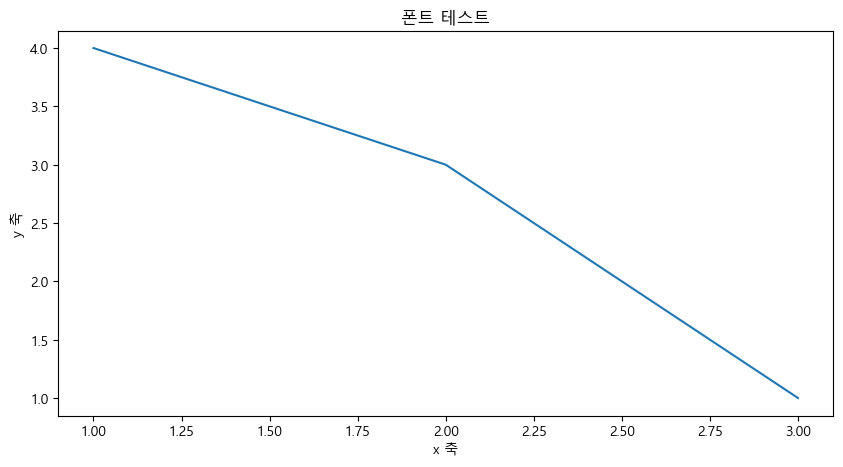

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'  # Malgun Gothic 폰트 파일 경로

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 것을 방지

# 테스트 플롯 생성
plt.figure(figsize=(10, 5))
plt.plot([1, 2, 3], [4, 3, 1])
plt.title('폰트 테스트')
plt.xlabel('x 축')
plt.ylabel('y 축')
plt

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(df, title='Correlation Matrix', figsize=(10,8), annot=True, cmap='coolwarm'):
    corr= df.corr()
    # 히트맵 생성
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, cmap=cmap, fmt='.2f', cbar=True, square=True, linewidths=0.5)

    # 타이틀 조정
    plt.title(title, fontsize=16)

    # 시각화
    plt.show

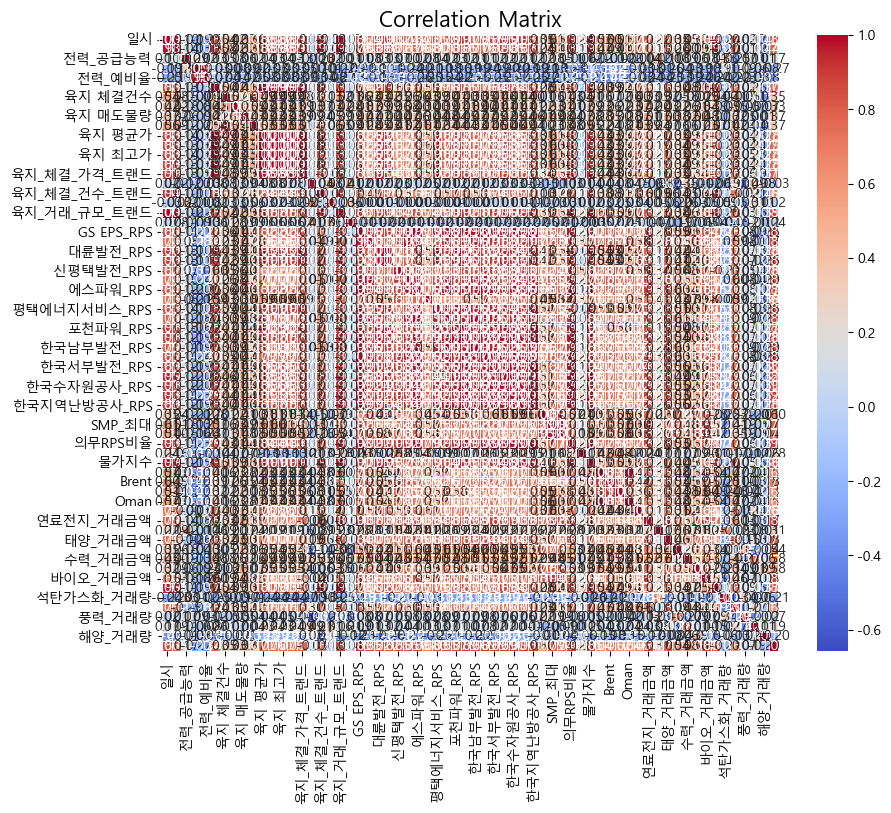

In [36]:
plot_correlation_matrix(df)

In [37]:
len(df.columns)

64

In [38]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

In [39]:
object_columns

[]

In [40]:
df.columns

Index(['일시', '전력_설비용량', '전력_공급능력', '전력_공급예비력', '전력_예비율', '육지 최저가', '육지 체결건수',
       '육지 체결물량', '육지 매도물량', '육지 매도건수', '육지 평균가', '육지 상한가', '육지 최고가', '육지 하한가',
       '육지_체결_가격_트랜드', '육지_체결_가격_주기성분', '육지_체결_건수_트랜드', '육지_체결_건수_주기성분',
       '육지_거래_규모_트랜드', '육지_거래_규모_주기성분', 'GS EPS_RPS', 'GS동해전력_RPS', '대륜발전_RPS',
       '동두천드림파워_RPS', '신평택발전_RPS', '씨지앤율촌전력_RPS', '에스파워_RPS', '파주에너지서비스_RPS',
       '평택에너지서비스_RPS', '포천민자발전_RPS', '포천파워_RPS', '한국남동발전_RPS', '한국남부발전_RPS',
       '한국동서발전_RPS', '한국서부발전_RPS', '한국수력원자력_RPS', '한국수자원공사_RPS', '한국중부발전_RPS',
       '한국지역난방공사_RPS', 'SMP_최소', 'SMP_최대', 'SMP_평균', '의무RPS비율', '경제성장률',
       '물가지수', 'Dubai', 'Brent', 'WTI', 'Oman', '달러', '연료전지_거래금액',
       '석탄가스화_거래금액', '태양_거래금액', '풍력_거래금액', '수력_거래금액', '해양_거래금액', '바이오_거래금액',
       '연료전지_거래량', '석탄가스화_거래량', '태양_거래량', '풍력_거래량', '수력_거래량', '해양_거래량',
       '바이오_거래량'],
      dtype='object')

# 범주형 변수는 제거하고 상관 분석 진행

In [41]:
for col in df.columns:
    if len(df[col].unique()) == 5:
        print(f"{col}'s unique values : {df[col].unique()}")

GS EPS_RPS's unique values : [ 497728  716958 1444851 1497250 1386445]
GS동해전력_RPS's unique values : [ 546175  811001 1195192 1200998  994583]
대륜발전_RPS's unique values : [ 71099  74099 176418 286732 254543]
동두천드림파워_RPS's unique values : [ 421115  515723  978704 1635857 1413802]
신평택발전_RPS's unique values : [129745 605662 936598 778824 906714]
씨지앤율촌전력_RPS's unique values : [ 497429  644591 1112228 1032085  913147]
에스파워_RPS's unique values : [360169 424243 857895 835501 806143]
파주에너지서비스_RPS's unique values : [ 932059 1140983 1765752 1199015 1903870]
평택에너지서비스_RPS's unique values : [316211 279285 507242 589591 540077]
포천민자발전_RPS's unique values : [307083 357608 765959 819231 661913]
포천파워_RPS's unique values : [203931 302110 685129 934803 824174]
한국남동발전_RPS's unique values : [5712435 6528419 8856179 9741392 9345274]
한국남부발전_RPS's unique values : [ 4578489  5488410 10307740 11522925  9198644]
한국동서발전_RPS's unique values : [4555345 5805711 8885190 8810963 8483243]
한국서부발전_RPS's unique values : [41

In [58]:
# 유니크 값이 5개인 컬럼명을 리스트에 담기 (5개년도 변수)
# 유니크 값이 59개인 컬럼명도 리스트에 담기 (5개년 달별 변수)
# 석탄 가스화 52개 (몇달 내용이 빠진듯)
# 환경 에너지 변수 (58개 -> 12월이 빠짐)
columns_to_drop = [col for col in df.columns if len(df[col].unique()) in[5,59,58,52]]

# 해당 컬럼 제거
df_cleaned = df.drop(columns=columns_to_drop)


In [59]:
df_cleaned.head()

,일시,전력_설비용량,전력_공급능력,전력_공급예비력,전력_예비율,육지 최저가,육지 체결건수,육지 체결물량,육지 매도물량,육지 매도건수,...,육지_거래_규모_트랜드,육지_거래_규모_주기성분,SMP_최소,SMP_최대,SMP_평균,Dubai,Brent,WTI,Oman,달러
0,2020-01-02,125333,95372,18192,23.6,41000,310,11548,70882,802,...,67383.323277,-19586.059069,79.04,89.69,85.52,65.69,66.25,61.18,66.27,1158.1
1,2020-01-07,125333,94123,13976,17.4,41700,535,32463,98131,1251,...,67625.308807,-24919.989870,81.94,89.50,85.84,68.34,68.27,62.70,69.10,1166.4
2,2020-01-09,125333,96303,17143,21.7,41000,670,32846,58631,1042,...,67722.103019,-25402.097576,81.24,89.47,86.10,66.17,65.37,59.56,66.41,1159.1
3,2020-01-14,125353,94425,12096,14.7,41100,902,62733,111808,1382,...,67964.088549,-22328.185785,81.94,89.48,86.48,64.78,64.49,58.23,65.01,1156.1
4,2020-01-16,125358,94735,12383,15.0,42200,816,51492,101680,1322,...,68060.882761,-19631.075340,81.95,89.73,86.62,64.74,64.62,58.52,64.80,1161.1


In [50]:
for col in df.columns:
    if len(df[col].unique()) == 59:
        print(f"{col}'s unique values : {df[col].unique()}")

연료전지_거래금액's unique values : [ 177.282932   166.8642386  196.8301144  186.7667204  200.8902069
  192.5054918  208.3034021  194.1197283  175.5107133  167.3950473
  165.3972697  235.4958571  252.761745   247.4863516  314.6008781
  282.6653994  300.4567667  290.8366204  334.8513382  380.8811377
  391.6878981  450.8469944  518.5489943  631.5077876  665.1093628
  780.1591838  871.9687573  902.7867744  648.9532508  521.9097297
  617.8633194  833.1237862  969.0989964 1095.687677  1048.475449
  763.1631132 1113.880787  1088.039636  1053.985243   674.8583793
  645.7286519  660.0291658  736.0465979  720.8592393  720.2928364
  776.9408115  697.9923768  791.4149115  820.2244357  658.3685046
  820.1150005  748.8824612  774.0216806  746.685585   815.7718578
  887.5863979  802.3374831  723.3694058  689.7319802]
태양_거래금액's unique values : [ 210.2590863  280.792167   424.2312375  435.052275   367.8761527
  365.4837581  285.1626592  292.4446096  244.7574474  252.445404
  181.2446591  232.2356143  242.8089

In [57]:
len(df['석탄가스화_거래금액'].unique())

52

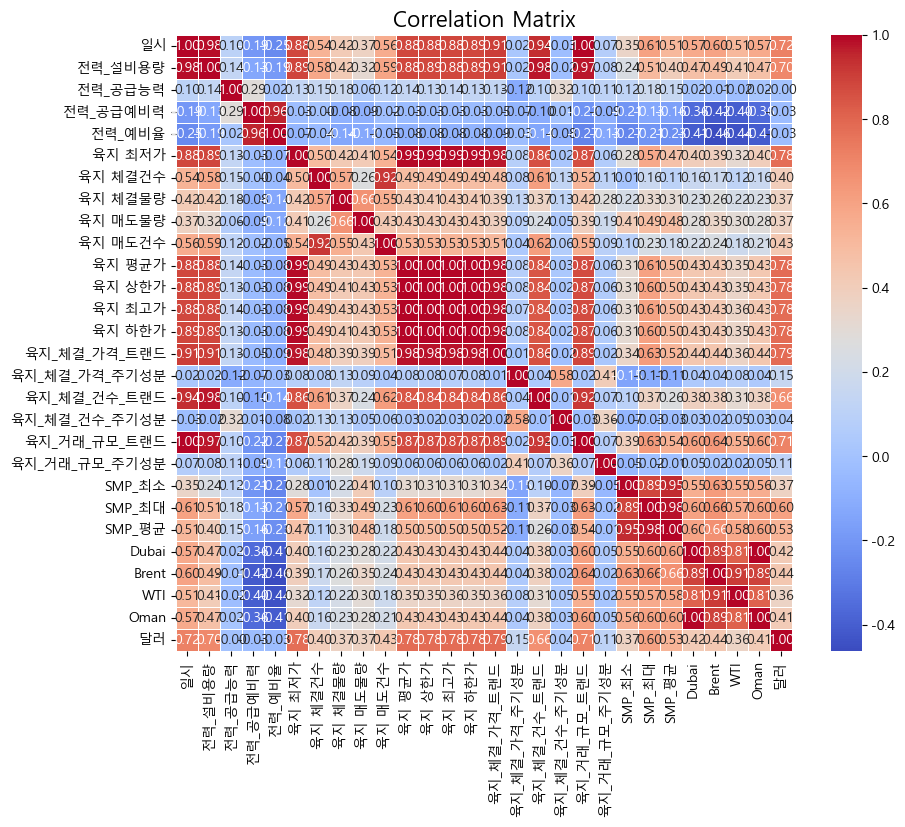

In [61]:
plot_correlation_matrix(df_cleaned)

# SMP 최대,최소,평균값은 서로 강한 양의 상관관계를 가지고 있음
# 육지 평균가 상한가, 하한가 및 트렌드는 강한 양의 상관관계를 가지고 있음
# 육지 평균가, 육지 상한가, 육지 최고가, 육지하한가 여기서도 하나만 끌어다 쓰자... 
# 근데 일단은 모든 변수 다 때려박고 해보는 것도 나쁘지 않을 수도?
- 독립 변수로 쓴다면 SMP 에서는 평균값을 쓰고
- 육지 평균가만 사용을 해야할 것으로 보임 
- 다중 공선성을 감소 하기 위해서 줄여야 할듯

In [27]:
df.to_csv(r'C:\Users\PC027\Desktop\Project\KOSPO공모전\전처리 데이터\dataframe_8.csv', encoding='cp949', index=False)